# Visualisation

In [8]:
# import libraries
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import seaborn as sns

# read in cleaned data file
df = pd.read_csv('netflix_titles_nov_2019_cleaned_3_yearmonth.csv', encoding='cp1252')

In [9]:
df.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29/11/2019 00:00,43798,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,2019,11
4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,43798,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019-11,2019,11


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      5837 non-null   object
 3   cast          5837 non-null   object
 4   country       5837 non-null   object
 5   date_added    5195 non-null   object
 6   filled_date   5837 non-null   int64 
 7   release_year  5837 non-null   int64 
 8   rating        5837 non-null   object
 9   duration      5837 non-null   object
 10  listed_in     5837 non-null   object
 11  description   5837 non-null   object
 12  type          5837 non-null   object
 13  Year_Month    5837 non-null   object
 14  Year          5837 non-null   int64 
 15  Month         5837 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 729.8+ KB


## Counts of title

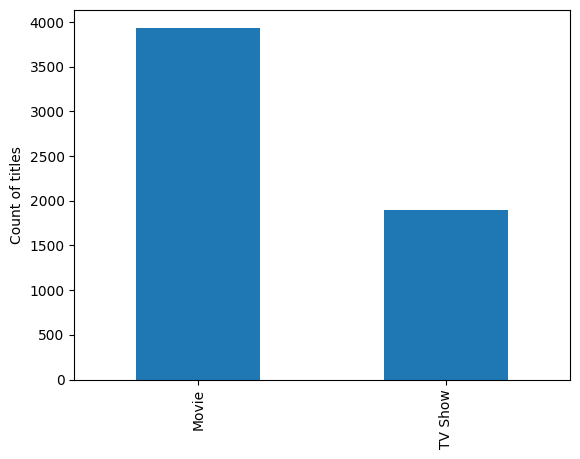

In [11]:
# count of titles by type
titles_by_type = df.groupby('type')['title'].count()

plt.figure()
titles_by_type.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

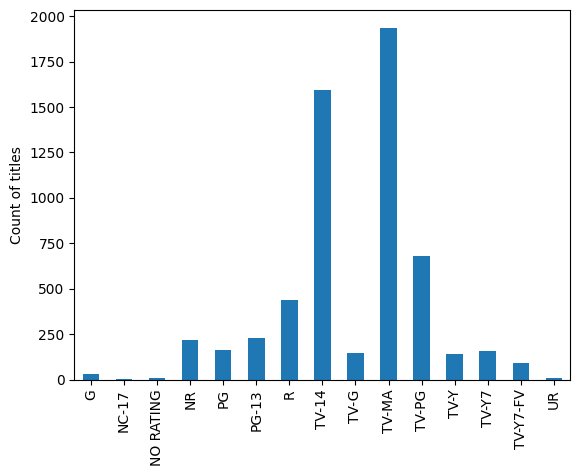

In [12]:
# count of titles by rating
titles_by_rating = df.groupby('rating')['title'].count()

plt.figure()
titles_by_rating.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

In [13]:
# separate out country into one row for each separate country
df['country'] = df['country'].str.split(', ')
df = df.explode('country').reset_index(drop=True)
df.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,29/11/2019 00:00,43798,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,2019,11
4,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",Senegal,29/11/2019 00:00,43798,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,2019,11


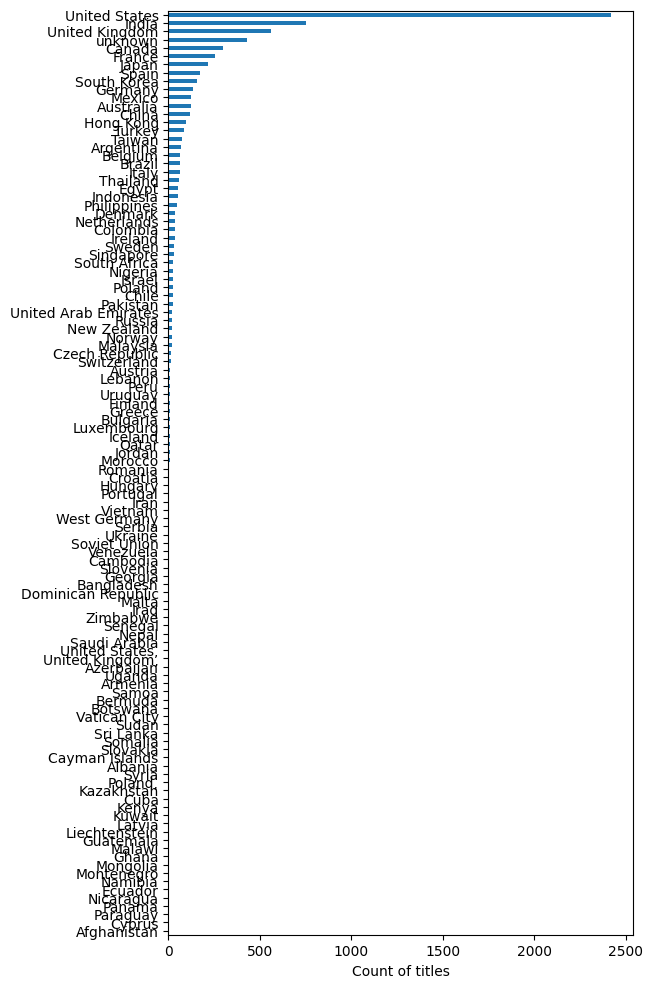

In [14]:
# count of titles by  country
titles_by_country = df.groupby('country')['title'].count()

# sort by count
titles_by_country = titles_by_country.sort_values()

plt.figure(figsize = (6,12))
titles_by_country.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

Country ISO codes downloaded [here](https://www.kaggle.com/datasets/juanumusic/countries-iso-codes).

In [59]:
# create world map
import plotly.express as px

# replace country names which aren't matched in geog data
df['country'] = df['country'].replace('Poland,', 'Poland')
df['country'] = df['country'].replace('West Germany', 'Germany') # not accurate mapping but best we can do
df['country'] = df['country'].replace('United States,', 'United States')
df['country'] = df['country'].replace('Soviet Union', 'Russia') # not accurate mapping but best we can do
df['country'] = df['country'].replace('United Kingdom,', 'United Kingdom')

geog = pd.read_csv('wikipedia-iso-country-codes.csv')

geog = geog[['English short name lower case', 'Alpha-3 code']].rename({'English short name lower case': 'country', 
                                                                       'Alpha-3 code': 'iso_alpha'}, axis = 1)

# replace country codes which don't match
geog['country'] = geog['country'].replace('Korea, Republic of (South Korea)', 'South Korea')
geog['country'] = geog['country'].replace('United States Of America', 'United States') 
geog['country'] = geog['country'].replace('Holy See (Vatican City State)', 'Vatican City') 
geog['country'] = geog['country'].replace('Syrian Arab Republic', 'Syria') 

df_geog = df.merge(geog, on = 'country', how = 'left')

# exclude unknown countries
df_geog = df_geog[df_geog['country'] != 'unknown']

# count titles by country
geog_titles_by_country = df_geog.groupby(['country', 'iso_alpha'])['title'].count().reset_index()

# plot chloropleth map
fig = px.choropleth(
    geog_titles_by_country, 
    locations = 'iso_alpha', 
    color = 'title', 
    hover_name = 'country',
    color_continuous_scale = 'Sunset'
)

fig.update_layout(
    title_text = 'Movies and TV shows on Netflix by country of production',
    title_x = 0.44,
    coloraxis_colorbar = dict(
        title = 'Number of movies/TV shows'
    )
)

fig.show()

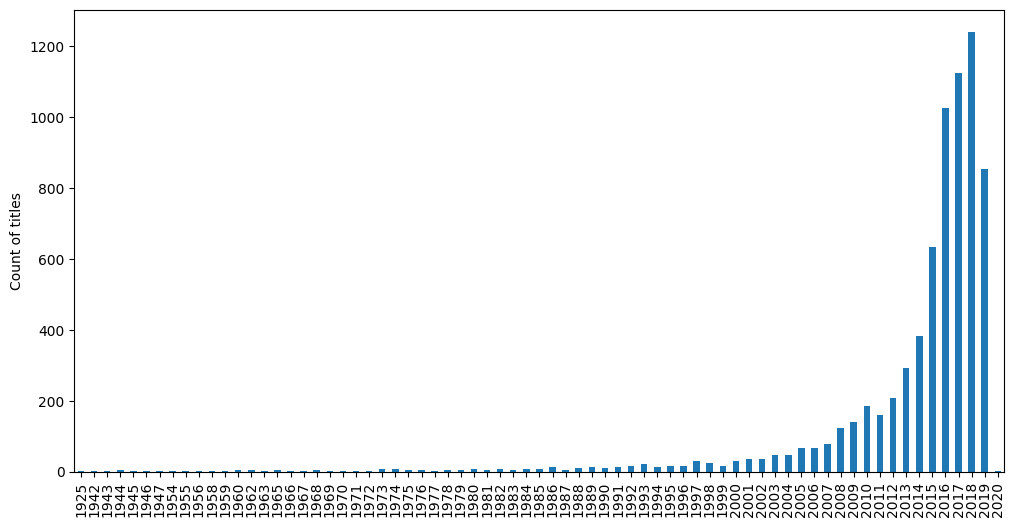

In [16]:
# count of titles by release year
titles_by_release_yr = df.groupby('release_year')['title'].count()

plt.figure(figsize = (12,6))
titles_by_release_yr.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

In [17]:
# separate out listed_in into one row for each separate genre
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in').reset_index(drop=True)
df.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
1,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
2,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
3,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11
4,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11


In [18]:
# look at overlap between genres
df['listed_in_combined'] = df['listed_in'].str.replace('TV Shows', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('Movies', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('Movies', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('TV', '')

# strip whitespace
df['listed_in_combined'] = df['listed_in_combined'].str.strip()

df['listed_in_combined'].unique()

array(['International', 'Korean', 'Romantic', 'Documentaries', 'Comedies',
       'Dramas', 'Independent', "Kids'", 'Thrillers', 'Crime',
       'Spanish-Language', 'Reality', 'Action & Adventure', 'Docuseries',
       'Children & Family', 'Anime Series',
       'Stand-Up Comedy & Talk Shows', 'Stand-Up Comedy', '', 'Mysteries',
       'Classic', 'Sci-Fi & Fantasy', 'Anime Features', 'Sports', 'Cult',
       'Horror', 'Teen', 'British', 'Music & Musicals', 'LGBTQ',
       'Science & Nature', 'Faith & Spirituality', 'Classic & Cult'],
      dtype=object)

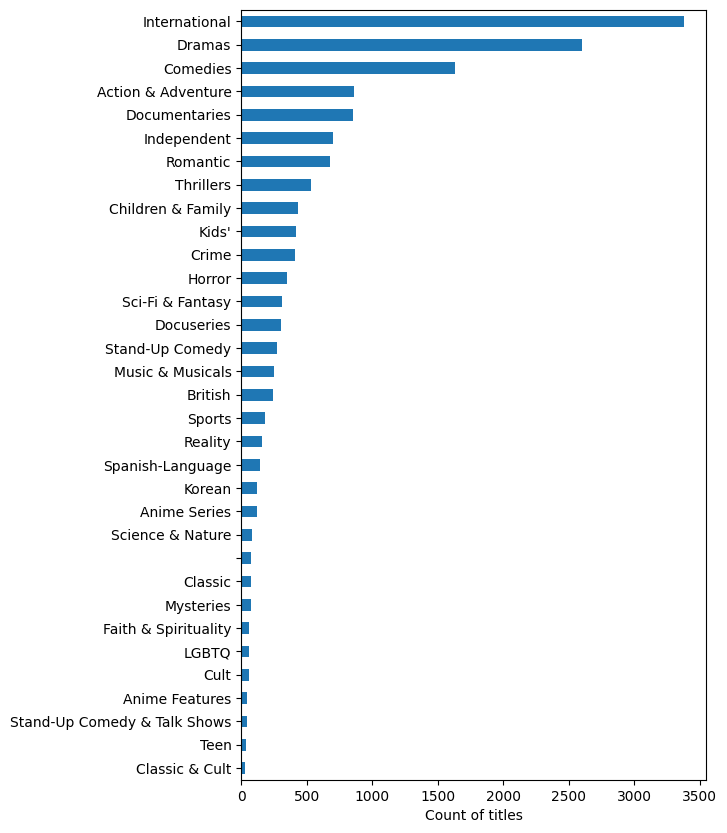

In [19]:
# count of titles by genre
titles_by_genre = df.groupby('listed_in_combined')['title'].count()

# sort by count
titles_by_genre = titles_by_genre.sort_values()

plt.figure(figsize = (6,10))
titles_by_genre.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

## Movies only

In [20]:
movie = df[df['type'] == 'Movie']

movie.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month,listed_in_combined
3,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11,Documentaries
4,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11,International
5,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,Comedies,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11,Comedies
6,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,Dramas,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11,Dramas
7,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,International Movies,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11,International


In [21]:
# remove 'min' and create numerical version of duration
movie['duration_num'] = movie['duration'].str[:-4]

movie['duration_num'] = pd.to_numeric(movie['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_3364\4080566439.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_3364\4080566439.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



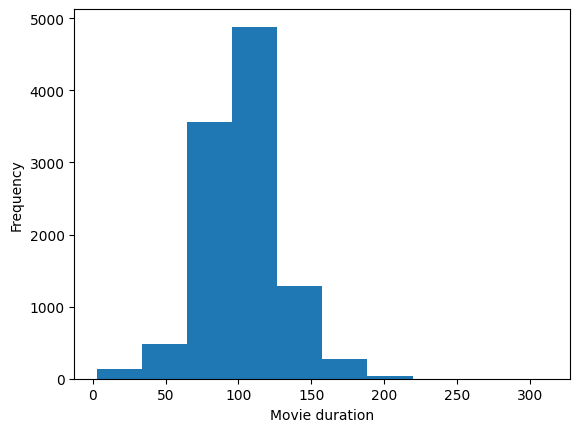

In [22]:
# count of movies by duration
plt.figure()

movie['duration_num'].plot(kind = 'hist')

plt.xlabel('Movie duration')

plt.show();

In [56]:
# count titles by country
movie_geog = df_geog[df_geog['type'] == 'Movie']

movie_titles_by_country = movie_geog.groupby(['country', 'iso_alpha'])['title'].count().reset_index()

# plot chloropleth map
fig = px.choropleth(
    movie_titles_by_country, 
    locations = 'iso_alpha', 
    color = 'title', 
    hover_name = 'country',
    color_continuous_scale = 'Sunset'
)

fig.update_layout(
    title_text = 'Movies on Netflix by country of production',
    title_x = 0.47,
    coloraxis_colorbar = dict(
        title = 'Number of movies'
    )
)

fig.show()

## TV shows only duration

In [24]:
tv = df[df['type'] == 'TV Show']

tv.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month,listed_in_combined
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11,International
1,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11,Korean
2,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11,Romantic
17,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...",Canada,NaN,43798,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019-11,2019,11,Kids'
18,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...",United Kingdom,NaN,43798,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019-11,2019,11,Kids'


In [25]:
# remove 'Season'/'Seasons' and create numerical version of duration
tv['duration_num'] = tv['duration'].str[:-7]

tv['duration_num'] = pd.to_numeric(tv['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_3364\3176011602.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_3364\3176011602.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



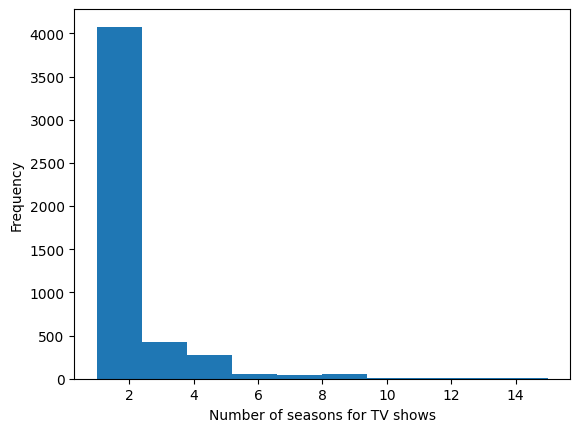

In [26]:
# count of tv shows by duration
plt.figure()

tv['duration_num'].plot(kind = 'hist')

plt.xlabel('Number of seasons for TV shows')

plt.show();

In [61]:
# count titles by country
tv_geog = df_geog[df_geog['type'] == 'TV Show']

tv_titles_by_country = tv_geog.groupby(['country', 'iso_alpha'])['title'].count().reset_index()

# plot chloropleth map
fig = px.choropleth(
    tv_titles_by_country, 
    locations = 'iso_alpha', 
    color = 'title', 
    hover_name = 'country',
    color_continuous_scale = 'Sunset'
)

fig.update_layout(
    title_text = 'TV shows on Netflix by country of production',
        title_x = 0.46,
    coloraxis_colorbar = dict(
        title = 'Number of TV shows'
    )
)

fig.show()

## Movie vs TV show comparison

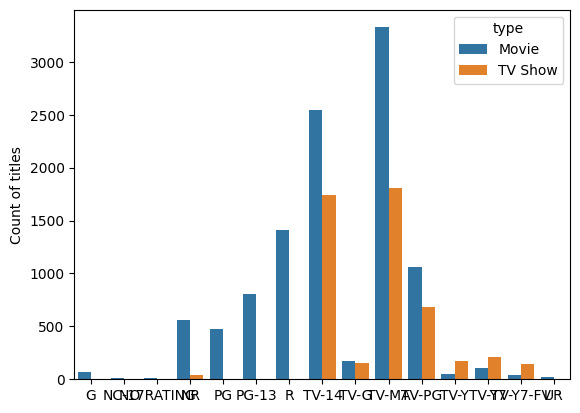

In [72]:
# count of titles by rating and type
titles_by_rating_type = df.groupby(['rating', 'type'])['title'].count().reset_index()

plt.figure()
sns.barplot(data = titles_by_rating_type, 
            x = 'rating', 
            y = 'title', 
            hue = 'type')
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

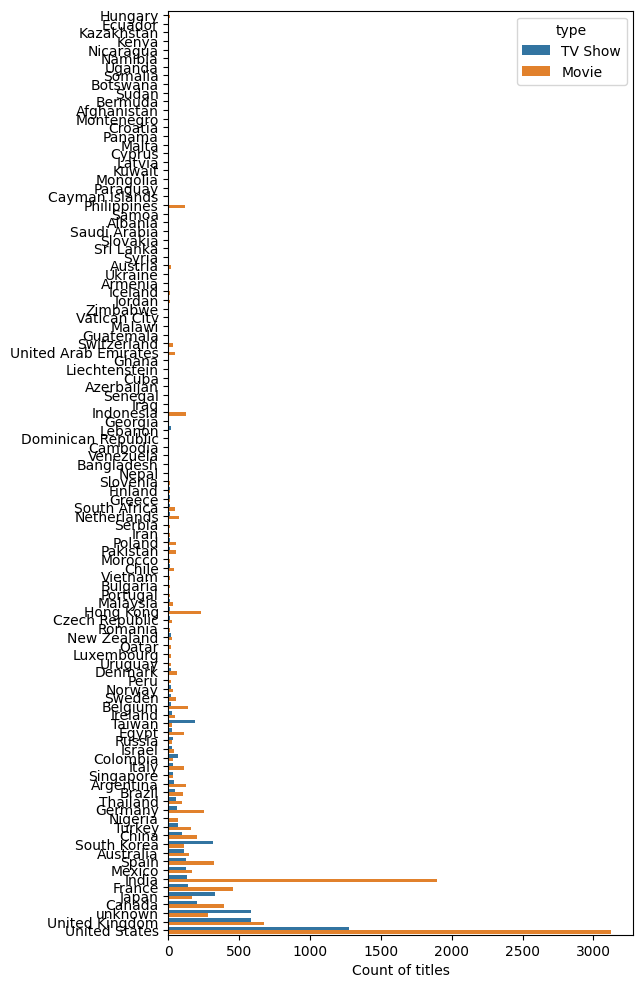

In [73]:
# count of titles by  country and type
titles_by_country_type = df.groupby(['country', 'type'])['title'].count().reset_index()

titles_by_country_type = titles_by_country_type.sort_values(by = 'title')

plt.figure(figsize = (6,12))
sns.barplot(data = titles_by_country_type, 
            x = 'title', 
            y = 'country', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

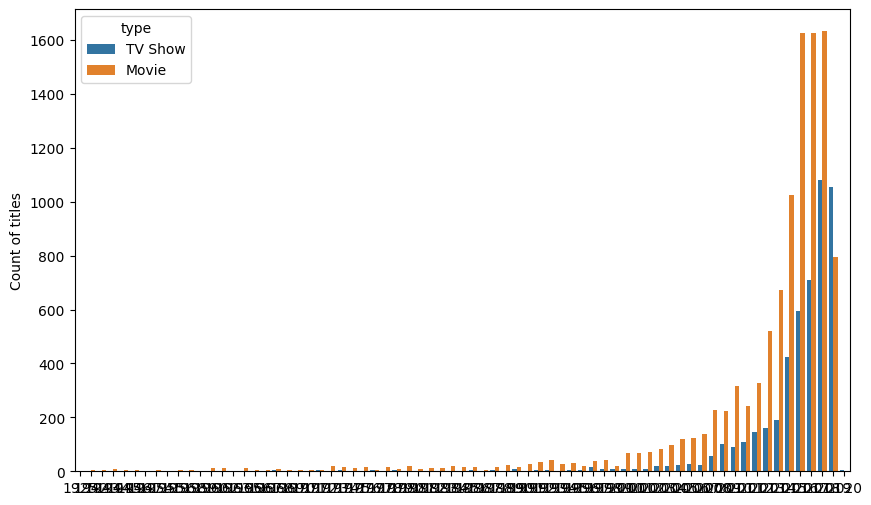

In [74]:
# count of titles by release year and type
titles_by_release_yr_type = df.groupby(['release_year', 'type'])['title'].count().reset_index()

titles_by_release_yr_type = titles_by_release_yr_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_release_yr_type, 
            x = 'release_year', 
            y = 'title', 
            hue = 'type')
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

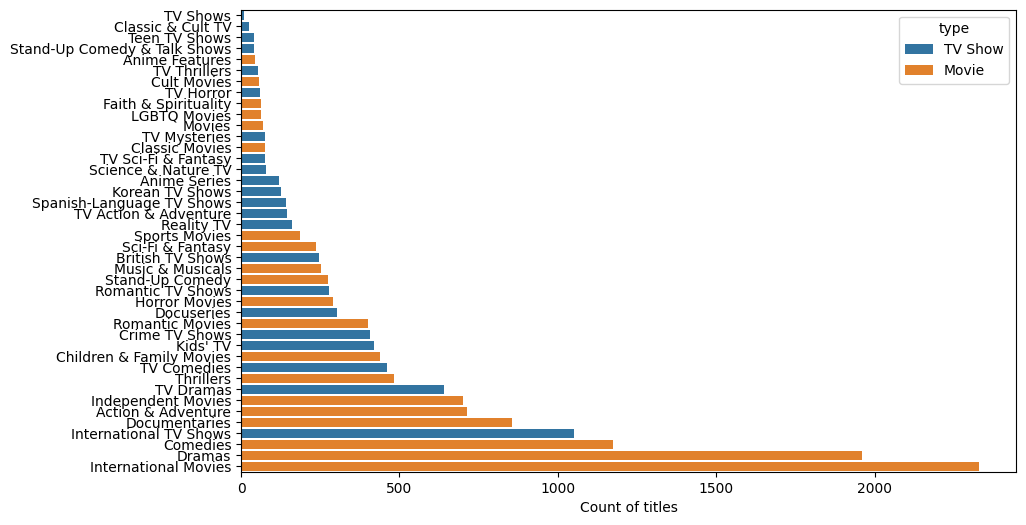

In [75]:
# count of titles by genre and type
titles_by_genre_type = df.groupby(['listed_in', 'type'])['title'].count().reset_index()

titles_by_genre_type = titles_by_genre_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_genre_type, 
            x = 'title', 
            y = 'listed_in', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

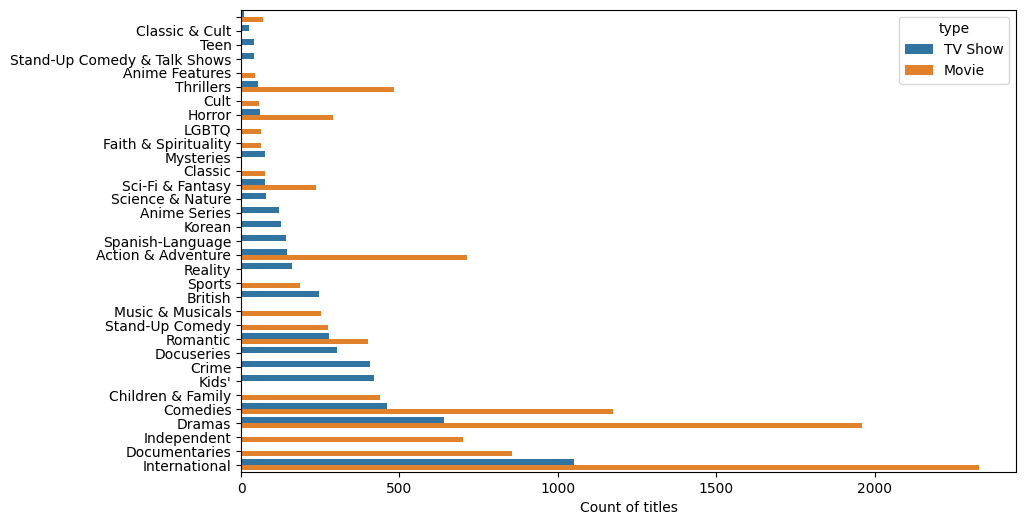

In [76]:
# count of titles by combined genre and type
titles_by_genre_type = df.groupby(['listed_in_combined', 'type'])['title'].count().reset_index()

titles_by_genre_type = titles_by_genre_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_genre_type, 
            x = 'title', 
            y = 'listed_in_combined', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

## Description

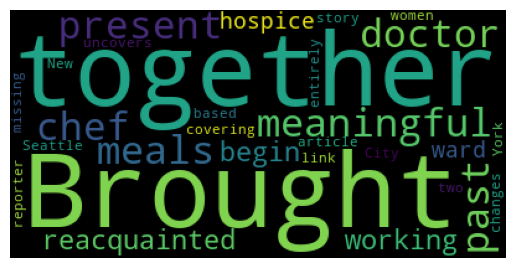

In [77]:
from wordcloud import WordCloud

text = df['description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis('off')
plt.show();

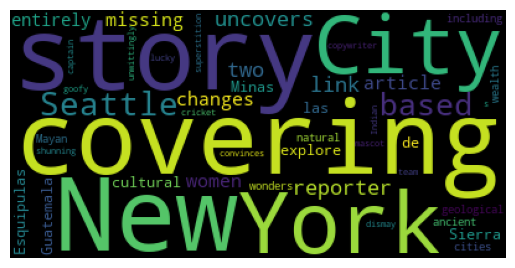

In [78]:
# wordcloud for movies
text_movie = movie['description'].values

wordcloud_movie = WordCloud().generate(str(text_movie))

plt.imshow(wordcloud_movie)
plt.axis('off')
plt.show();

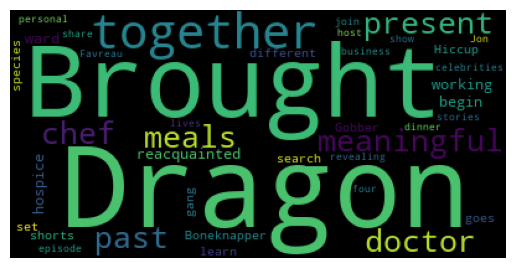

In [79]:
# wordcloud for tv shows
text_tv = tv['description'].values

wordcloud_tv = WordCloud().generate(str(text_tv))

plt.imshow(wordcloud_tv)
plt.axis('off')
plt.show();

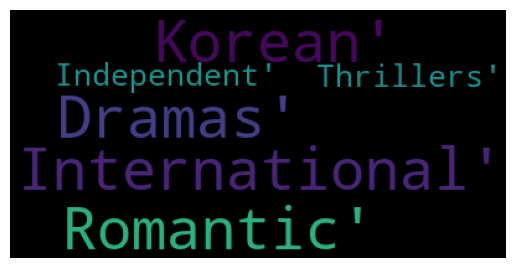

In [80]:
# wordcloud for genre
text_genre = df['listed_in_combined'].values

wordcloud_genre = WordCloud().generate(str(text_genre))

plt.imshow(wordcloud_genre)
plt.axis('off')
plt.show();

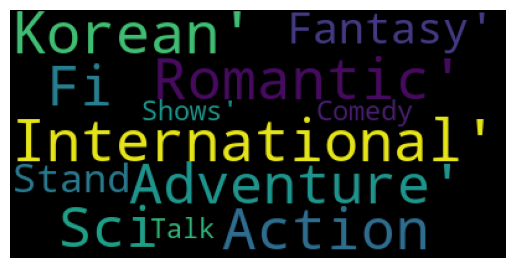

In [81]:
# wordcloud for tv genre
text_genre_tv = tv['listed_in_combined'].values

wordcloud_genre_tv = WordCloud().generate(str(text_genre_tv))

plt.imshow(wordcloud_genre_tv)
plt.axis('off')
plt.show();

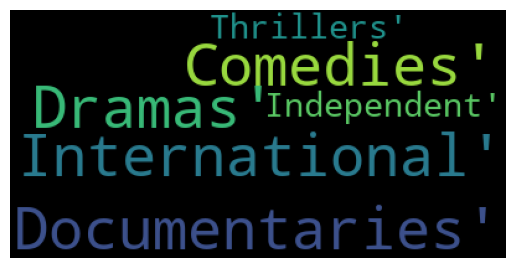

In [82]:
# wordcloud for movie genre
text_genre_movie = movie['listed_in_combined'].values

wordcloud_genre_movie = WordCloud().generate(str(text_genre_movie))

plt.imshow(wordcloud_genre_movie)
plt.axis('off')
plt.show();

## Dates added

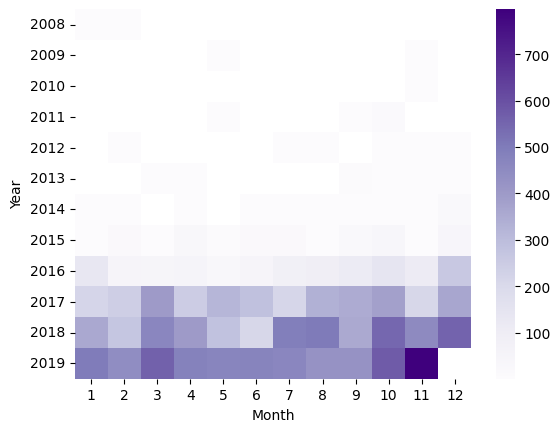

In [86]:
# add separate column for month and year
month_year_added = df.groupby(['Year', 'Month'])['title'].count().reset_index()

month_year_added_wide = month_year_added.pivot_table(
    index = 'Year', 
    columns = 'Month', 
    values = 'title'
)

sns.heatmap(month_year_added_wide, cmap = "Purples")

plt.show();